In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/baseball.csv')
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
for i in df:
    print(i,df[i].unique().size)

W 24
R 28
AB 29
H 29
2B 22
3B 23
HR 27
BB 29
SO 29
SB 27
RA 30
ER 30
ERA 30
CG 9
SHO 12
SV 20
E 21


In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


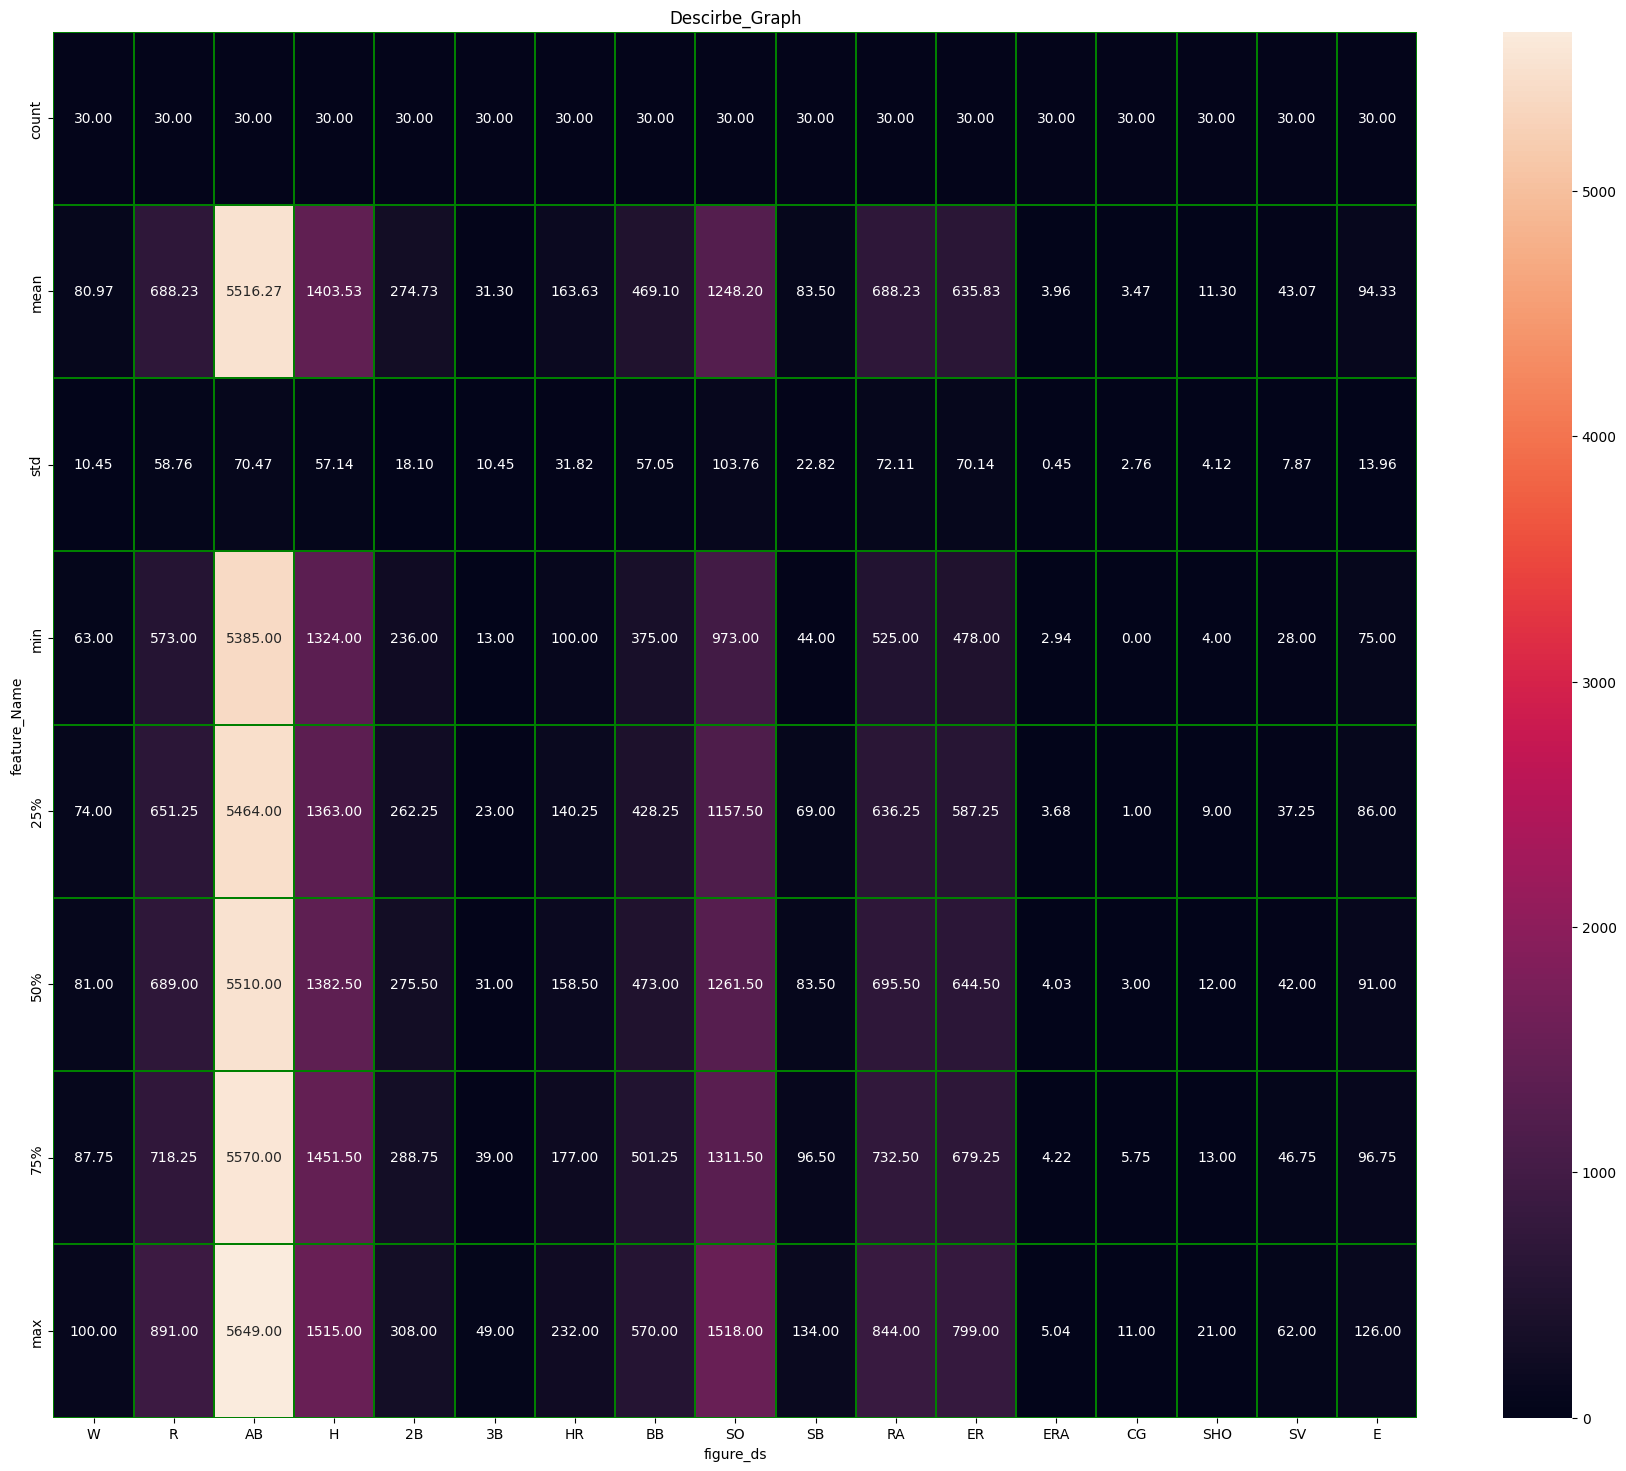

In [8]:
plt.figure(figsize=(22,18))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='green')
plt.xlabel('figure_ds',fontsize=10)
plt.ylabel('feature_Name',fontsize=10)
plt.title('Descirbe_Graph')
plt.show()

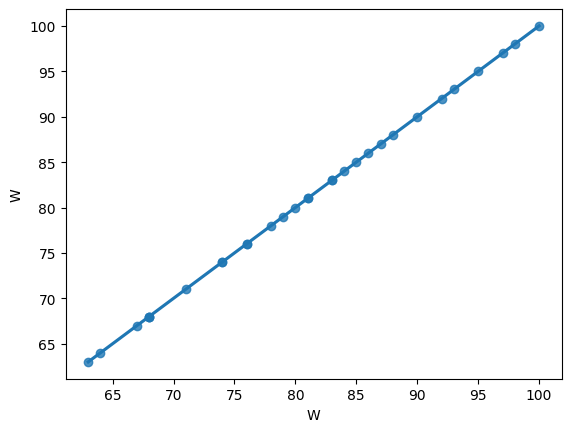

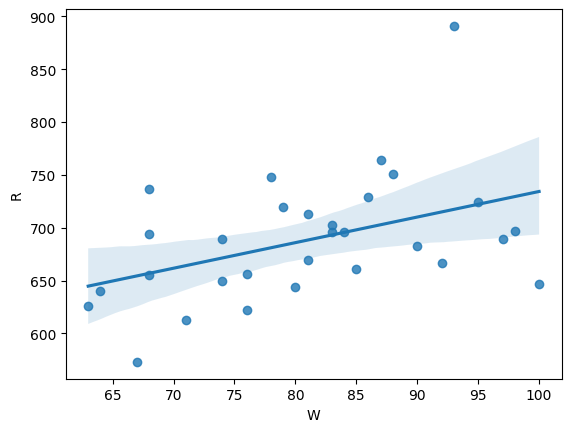

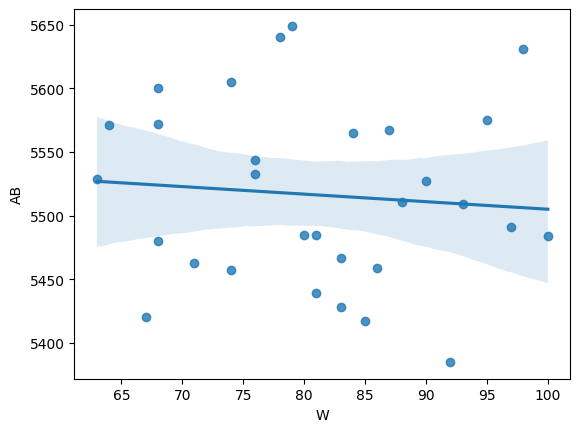

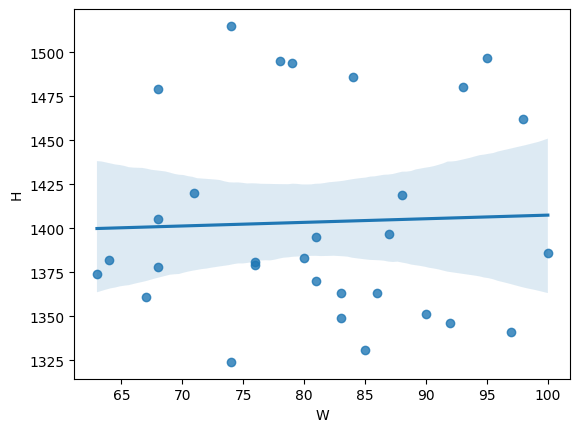

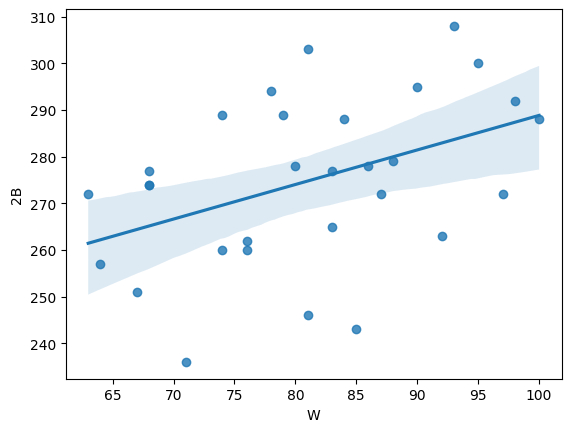

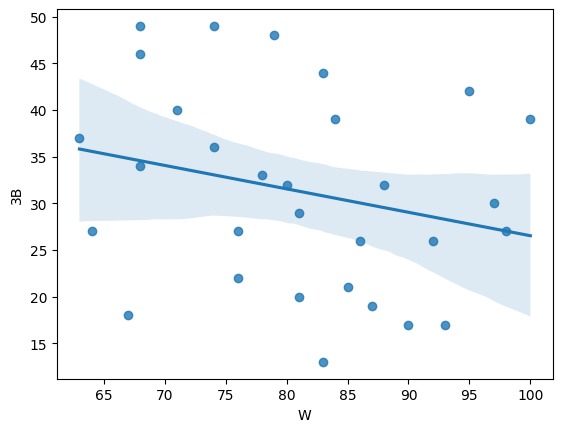

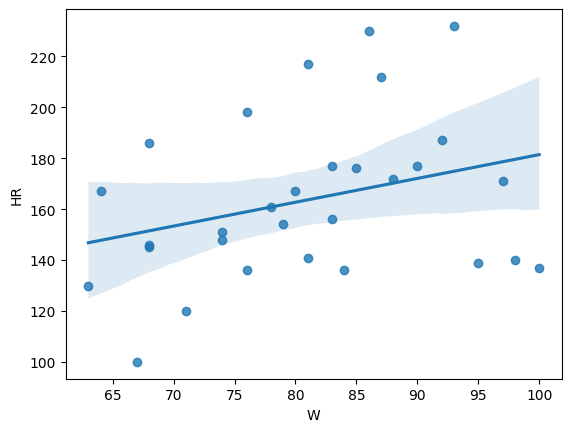

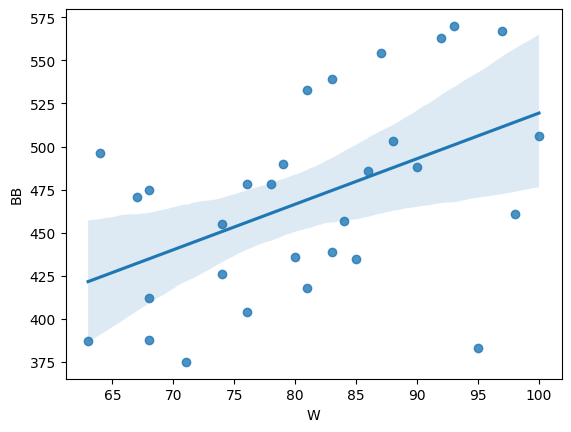

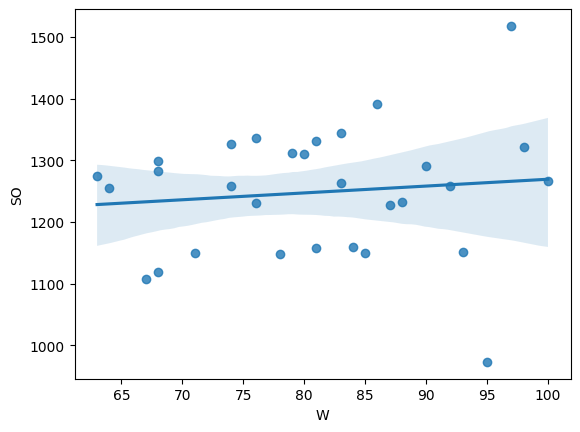

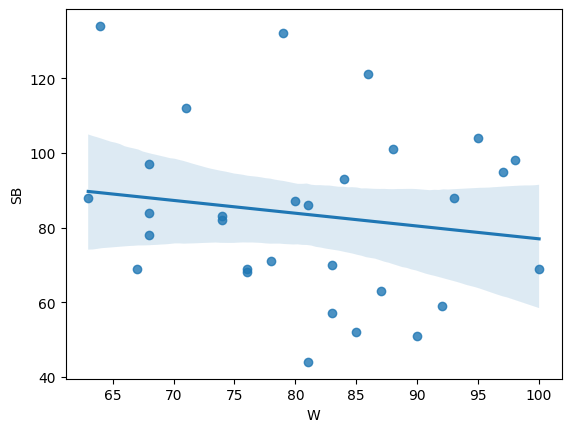

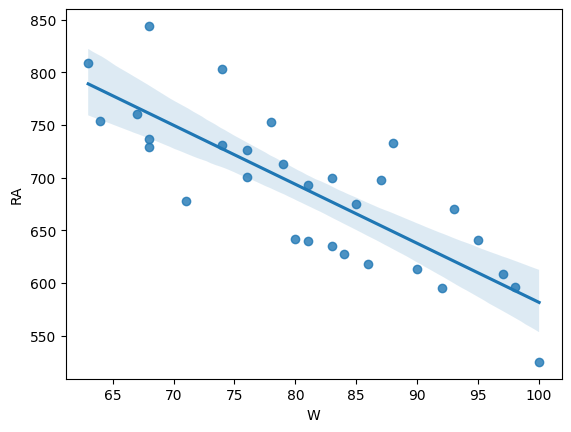

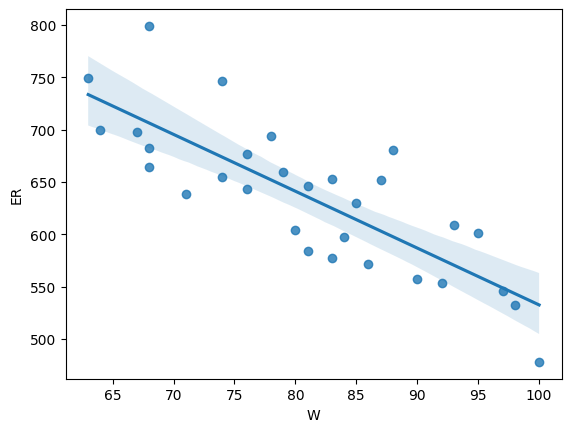

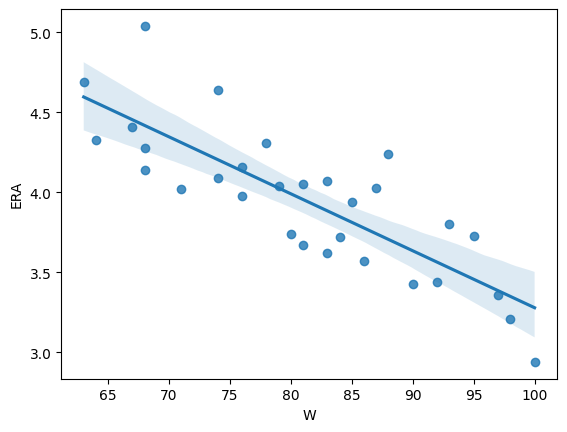

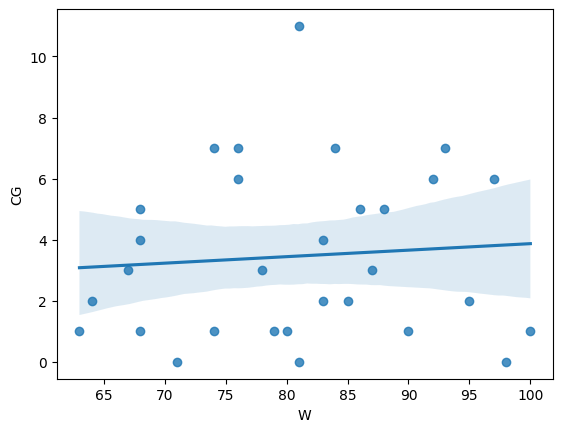

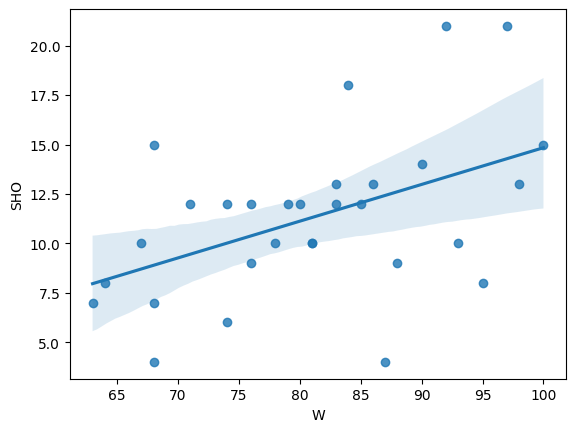

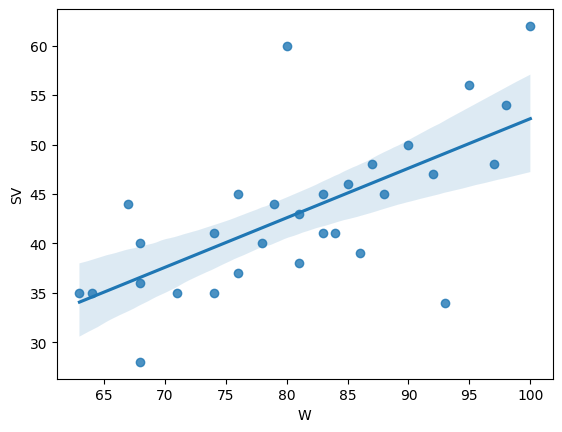

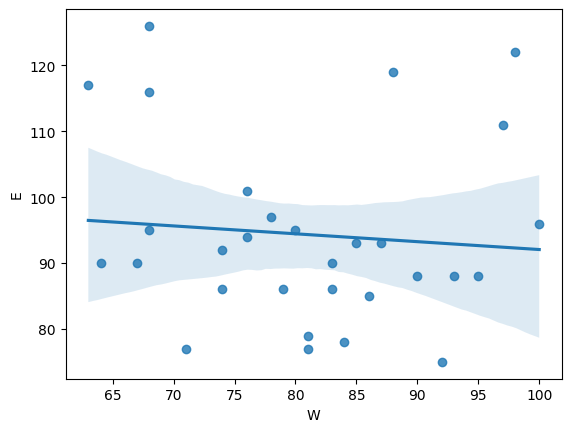

In [9]:
# Get the list of column names
columns = df.columns
plotnumber=1
# Create reg plots in a loop
for i in range(len(columns)):
        if plotnumber<=13:
            sns.regplot(x='W', y=columns[i], data=df)
        plotnumber=+1
        plt.show()

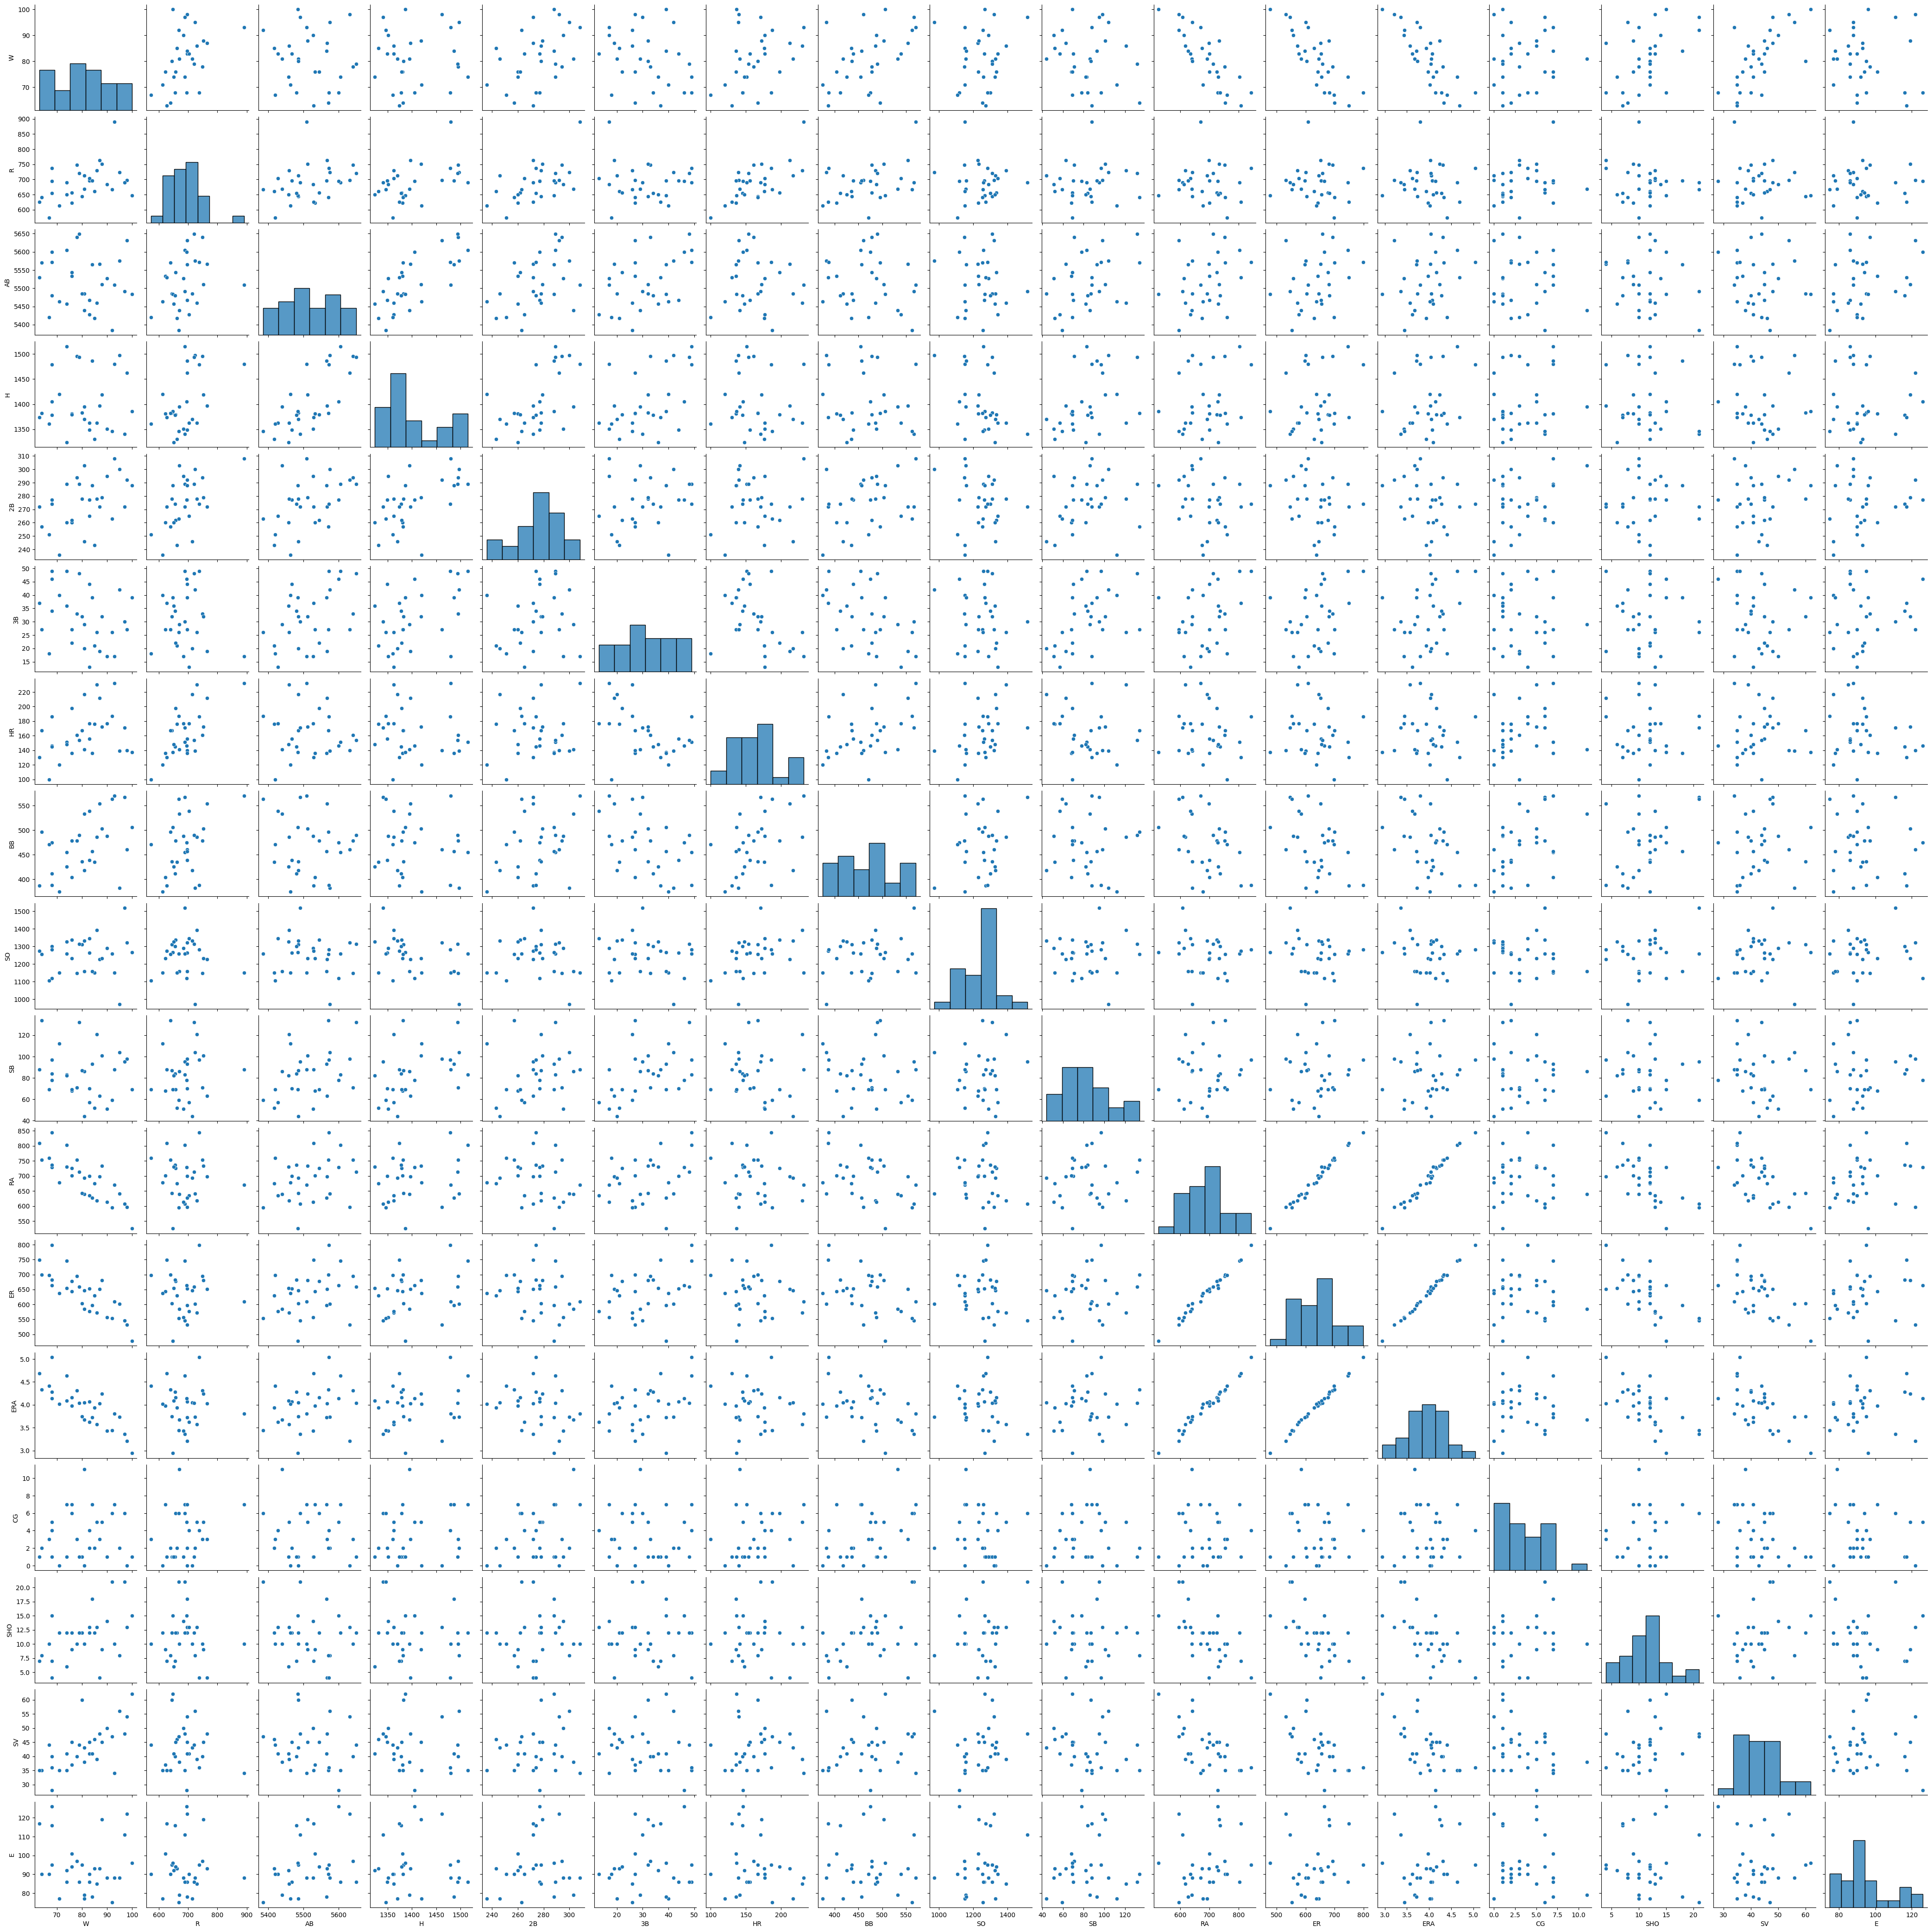

In [10]:
sns.pairplot(data=df,palette='dark')

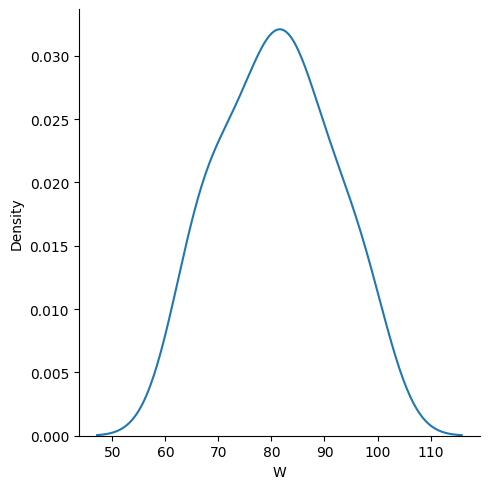

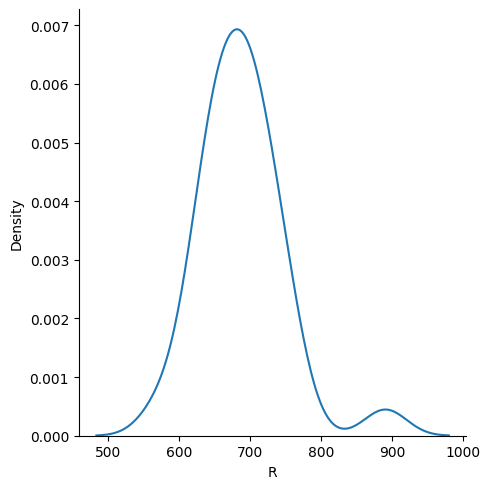

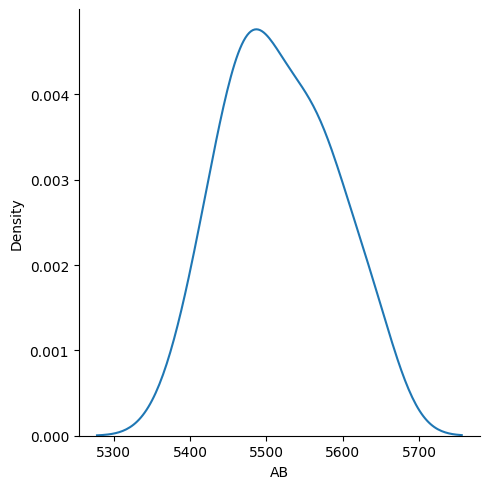

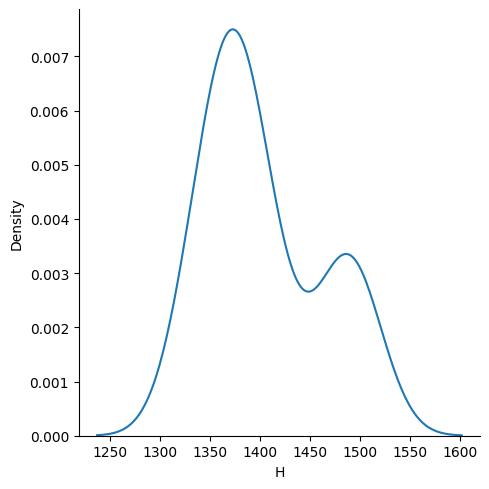

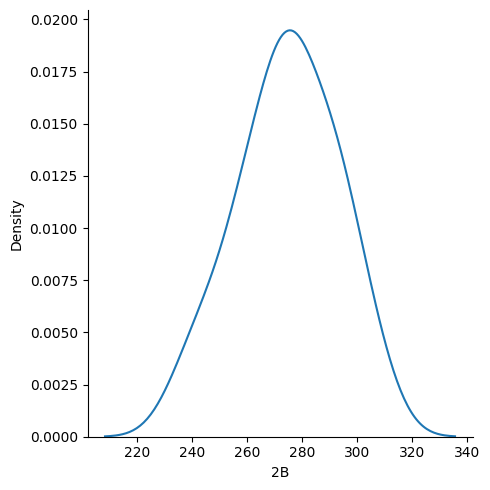

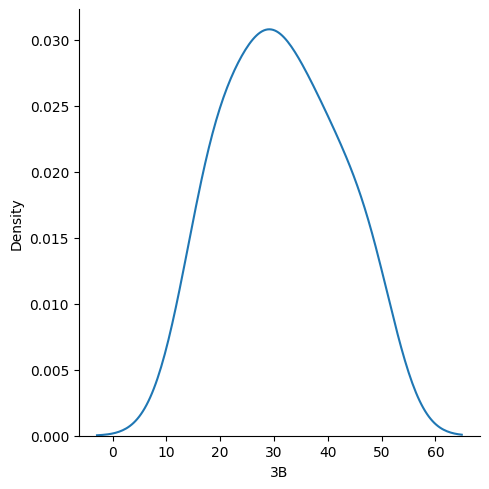

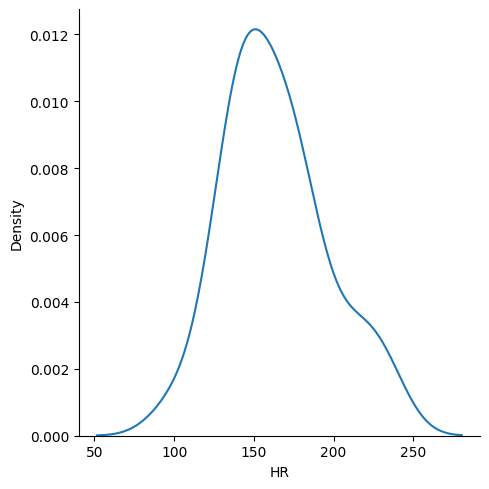

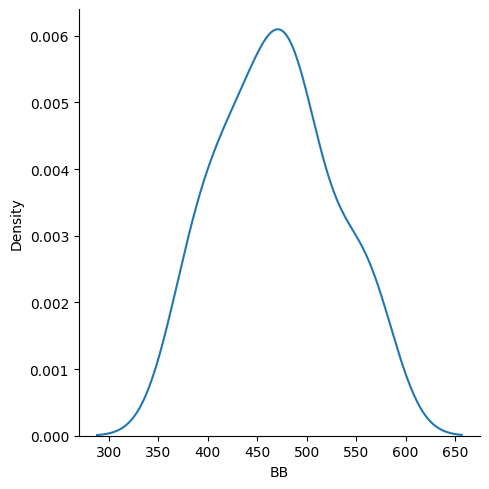

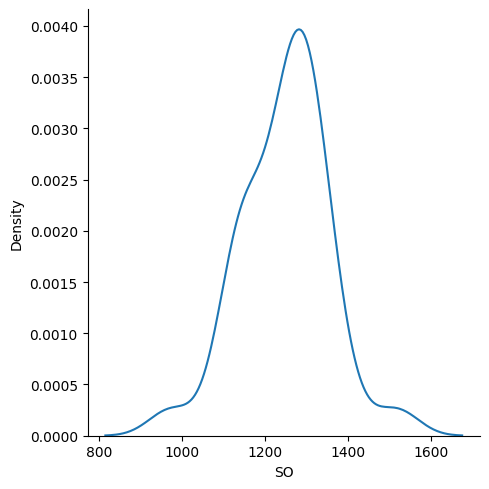

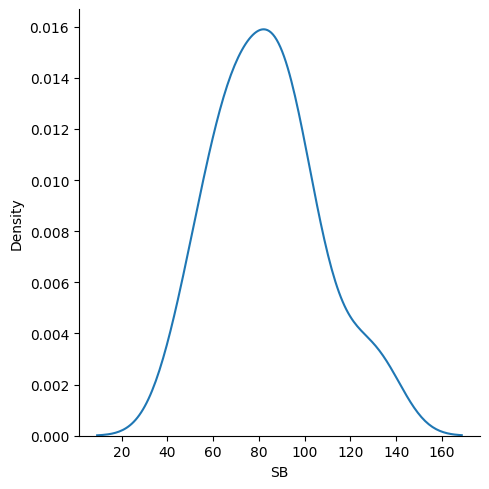

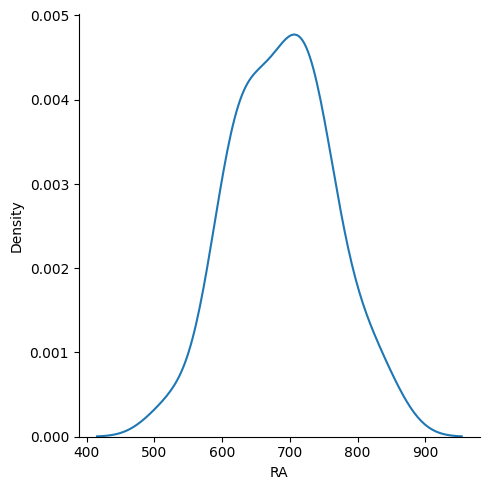

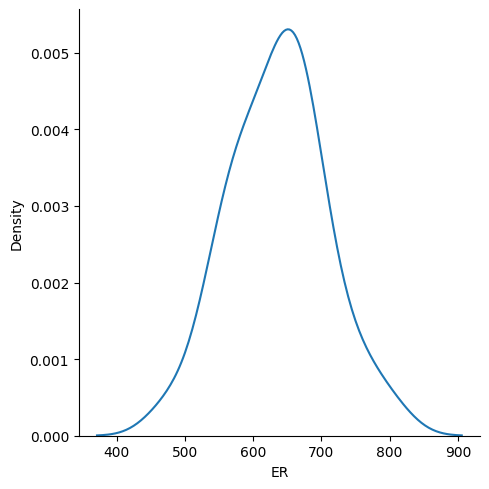

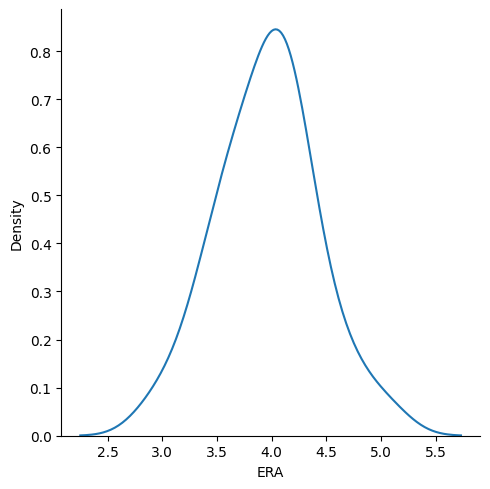

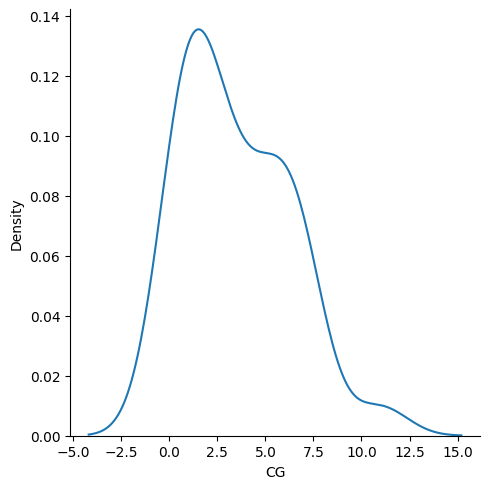

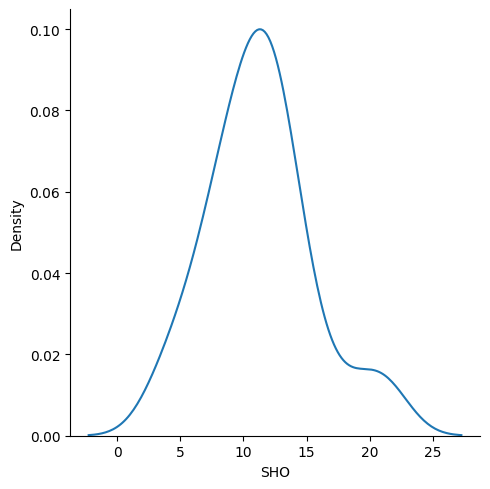

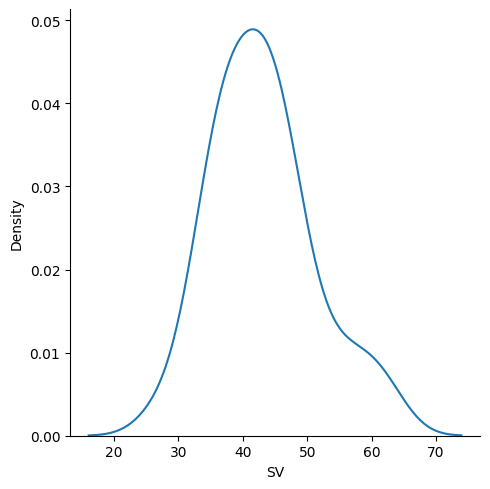

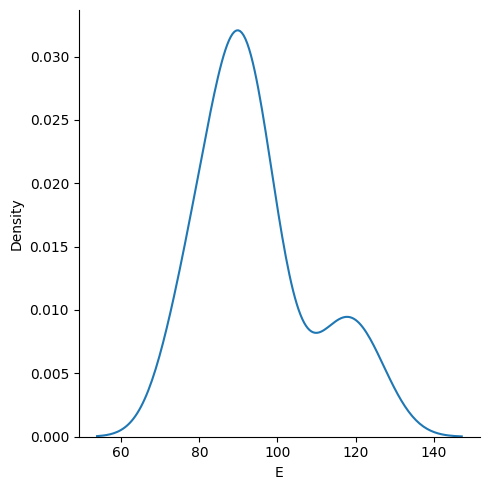

In [11]:
for i in df:
    sns.displot(data=df,x=i,kind='kde')
    

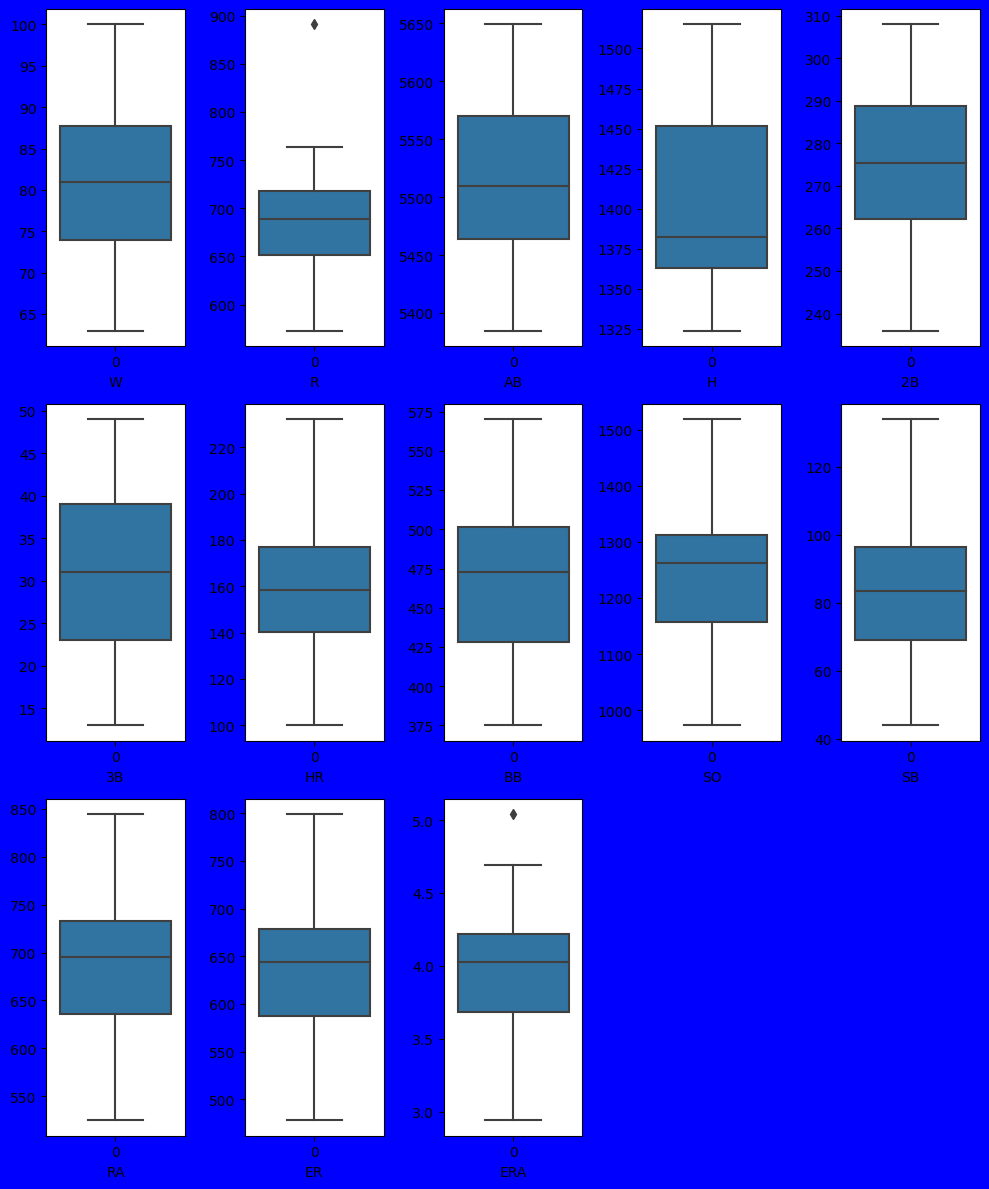

In [12]:
plt.figure(figsize=(10,12),facecolor='blue')
plotnumber=1
for column in df:
    if plotnumber <=13:
        anext=plt.subplot(3,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

<function matplotlib.pyplot.show(close=None, block=None)>

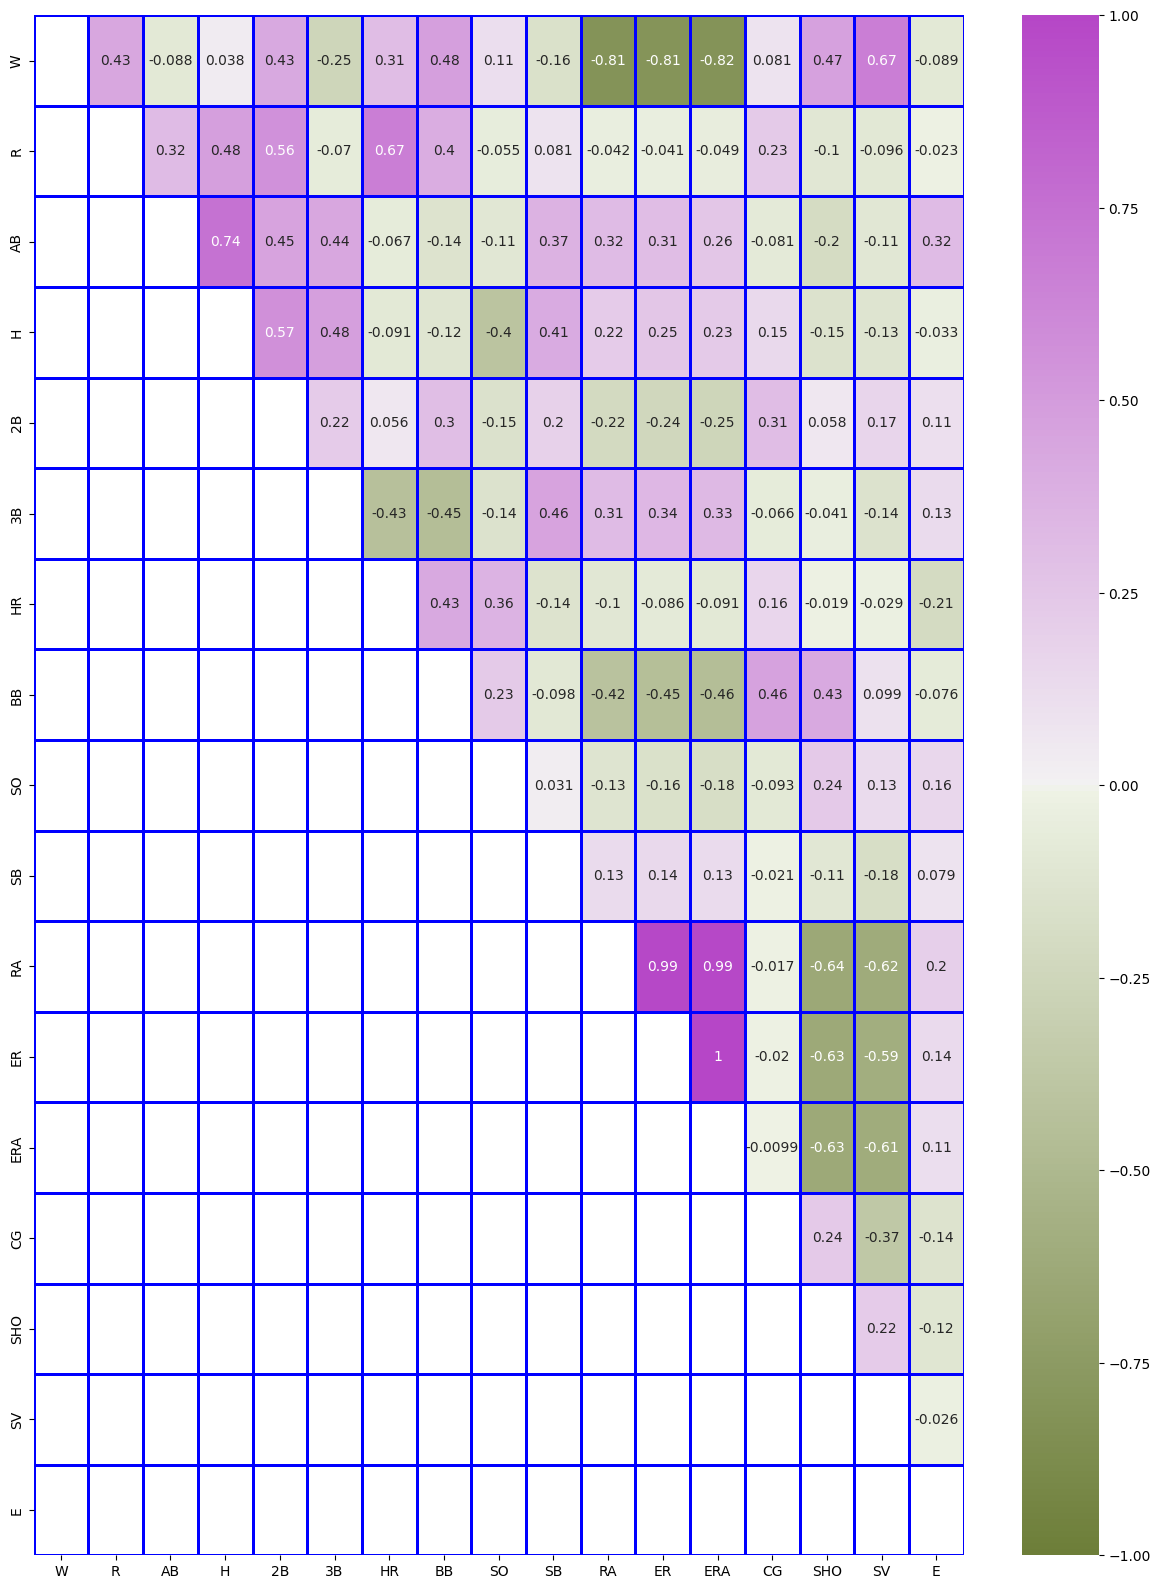

In [13]:
v=df.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':10},fmt='0.2g',linewidths=2,linecolor='blue',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show

In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [15]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/df.shape[0]*100)

## dataloss:
3.3333333333333335


In [16]:
x=df.drop(columns=['W'])
y=df['W']

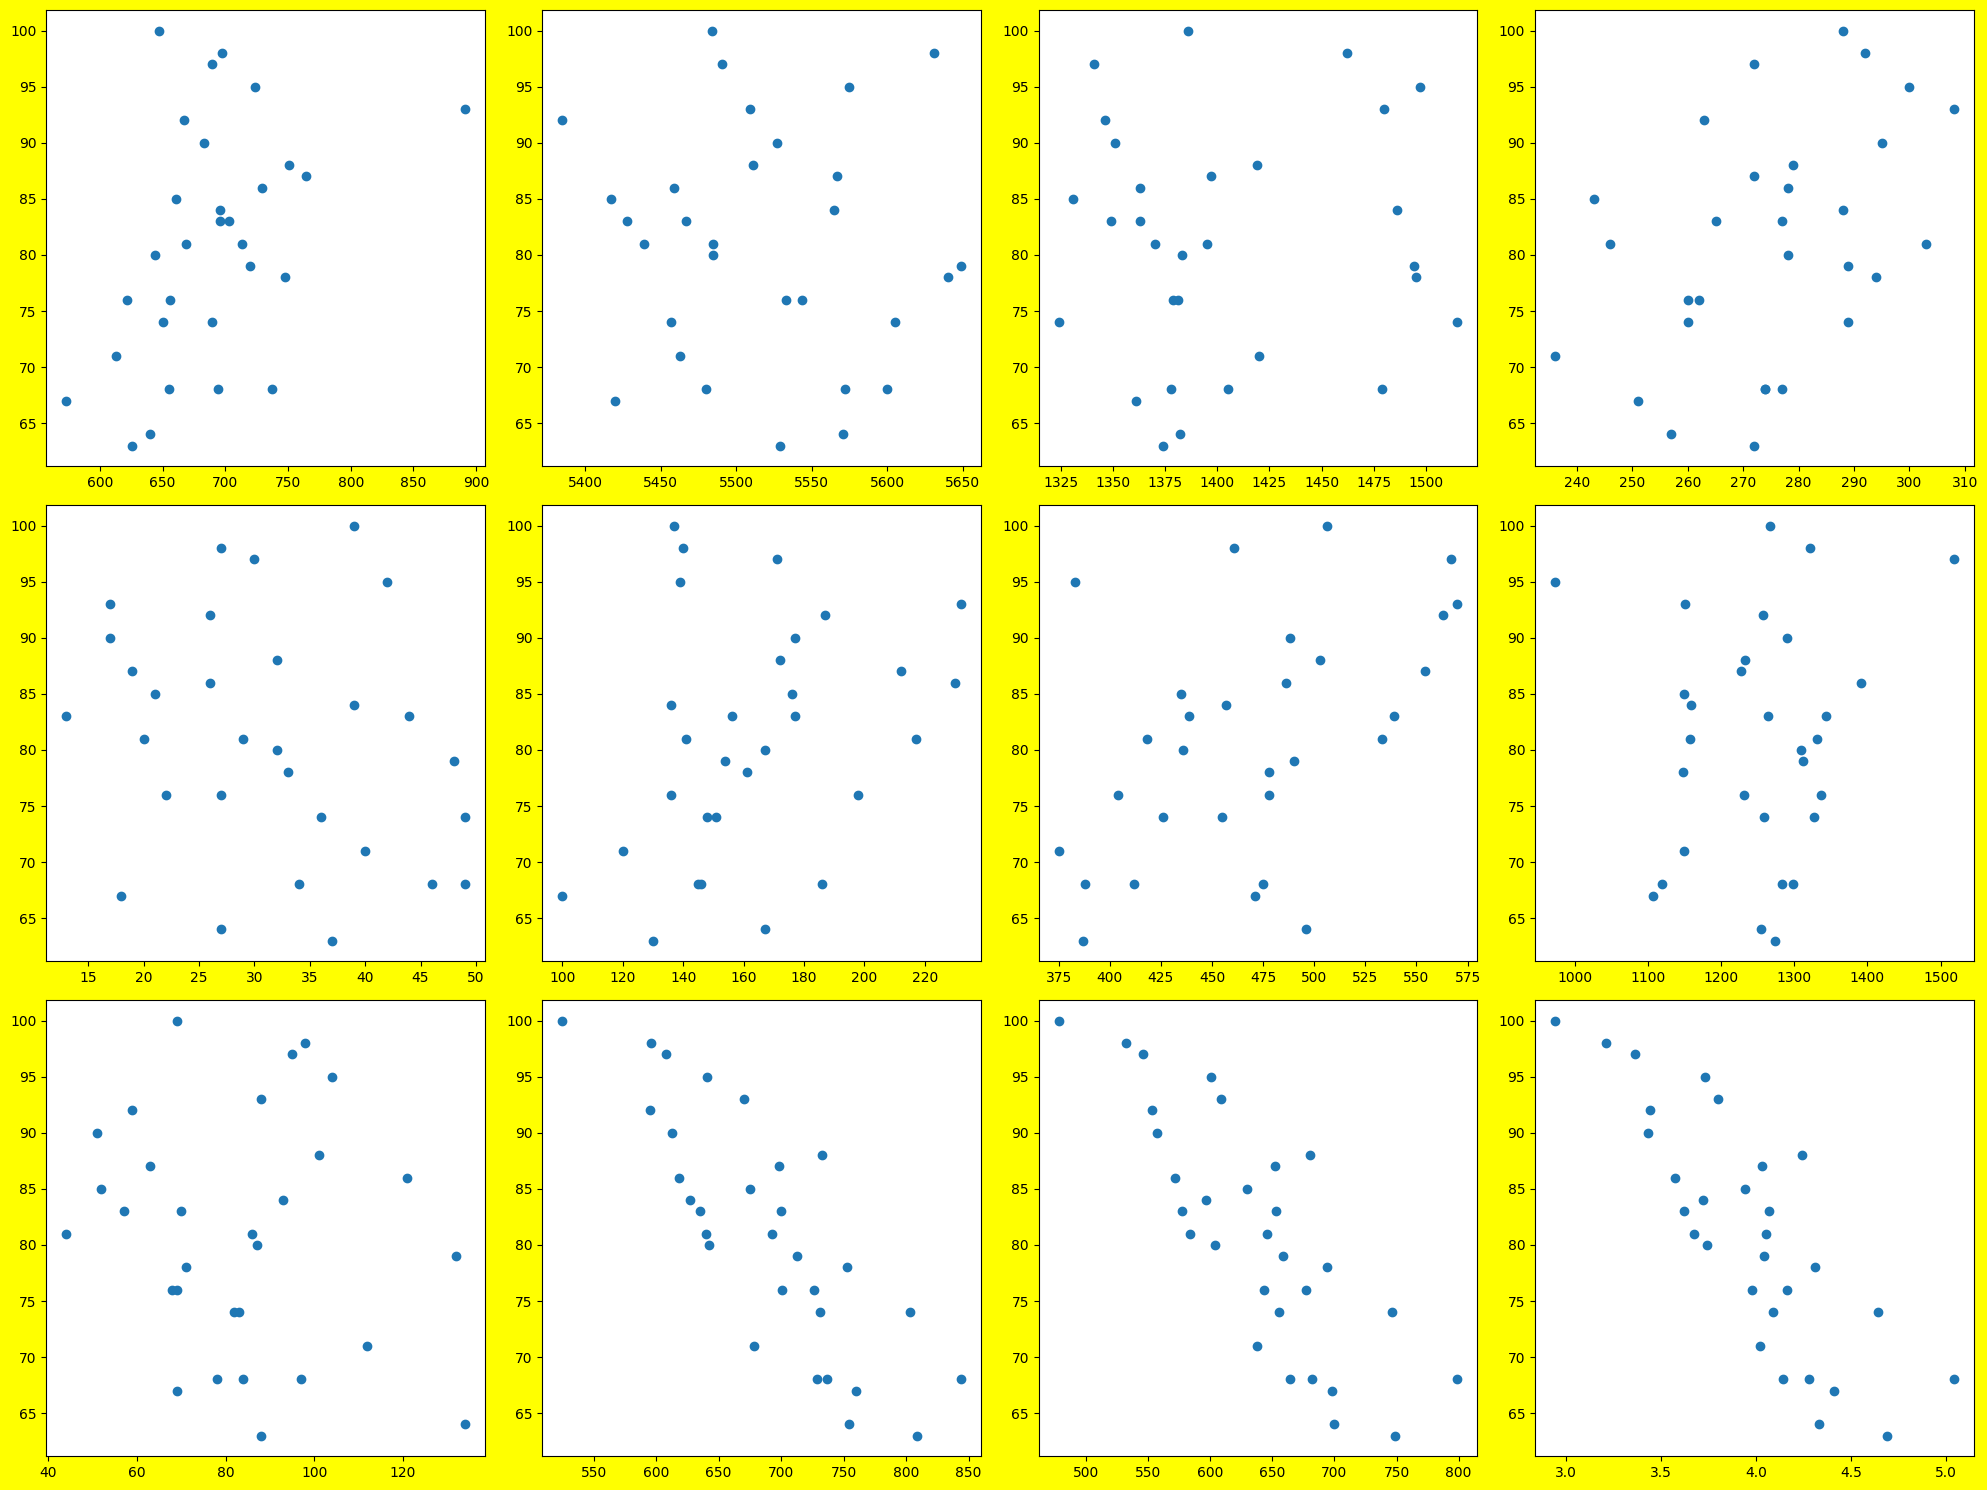

In [17]:
plt.figure(figsize=(20,15), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=12:
        plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plotnumber+=1
plt.tight_layout() 

In [18]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [19]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    regression_lr=LinearRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs) 

Maximum accuracy: 0.9172122929401225 on random state: 114


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)

In [21]:
regression_lr=LinearRegression()
regression_lr.fit(x_train,y_train)
pred_lr=regression_lr.predict(x_test)
pred_lr_train=regression_lr.predict(x_train)
r2tlr=r2_score(y_test,pred_lr)
r2trlr=r2_score(y_train,pred_lr_train)
mab_error=mean_absolute_error(y_test,pred_lr)
msq_error=mean_squared_error(y_test,pred_lr)
root_error=np.sqrt(mean_squared_error(y_test,pred_lr))
cv_score_lr=cross_val_score(regression_lr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lr)
print('avg:',cv_score_lr.mean())
r2_cv=r2_score(y_test,pred_lr)-cv_score_lr.mean()



cv_score [ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
avg: 0.04075540667455881


In [22]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_dtr_train=dtr.predict(x_train)
r2tdt=r2_score(y_test,pred_dtr)
r2trdt=r2_score(y_train,pred_dtr_train)
mab_error_dt=mean_absolute_error(y_test,pred_dtr)
msq_error_dt=mean_squared_error(y_test,pred_dtr)
root_error_dt=np.sqrt(mean_squared_error(y_test,pred_dtr))
cv_score_dt=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_dt)
print('avg:',cv_score_dt.mean())
r2_cv_dt=(r2_score(y_test,pred_dtr)-cv_score_dt.mean())


cv_score [-1.09413854 -8.91603053 -0.38690023  0.63453689  0.55798817]
avg: -1.840908849798436


In [23]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_et=ETR.predict(x_test)
pred_et_train=ETR.predict(x_train)
r2tet=r2_score(y_test,pred_et)
r2tret=r2_score(y_train,pred_et_train)
mab_error_et=mean_absolute_error(y_test,pred_et)
msq_error_et=mean_squared_error(y_test,pred_et)
root_error_et=np.sqrt(mean_squared_error(y_test,pred_et))
cv_score_et=cross_val_score(ETR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_et)
print('avg:',cv_score_et.mean())
r2_cv_et=(r2_score(y_test,pred_et)-cv_score_et.mean())

cv_score [-0.04051004 -4.9762187   0.41324113  0.41881419  0.79646544]
avg: -0.6776415950629333


In [24]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_kn=KNN.predict(x_test)
pred_kn_train=KNN.predict(x_train)
r2tkn=r2_score(y_test,pred_kn)
r2trkn=r2_score(y_train,pred_kn_train)
mab_error_kn=mean_absolute_error(y_test,pred_kn)
msq_error_kn=mean_squared_error(y_test,pred_kn)
root_error_kn=np.sqrt(mean_squared_error(y_test,pred_kn))
cv_score_kn=cross_val_score(KNN,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_kn)
print('avg:',cv_score_kn.mean())
r2_cv_kn=(r2_score(y_test,pred_kn)-cv_score_kn.mean())

cv_score [ 0.3164476  -2.36687023  0.32268088  0.34337206  0.56615385]
avg: -0.1636431681468944


In [25]:
ml_compare=pd.DataFrame()
data1={'regressior_name':regression_lr,'r2_score_train':r2trlr,'r2_score_test':r2tlr,'mean_absolute_error':mab_error,'root_error':root_error,'r2-cv':r2_cv}
data2={'regressior_name':dtr,'r2_score_train':r2trdt,'r2_score_test':r2tdt,'mean_absolute_error':mab_error_dt,'root_error':root_error_dt,'r2-cv':r2_cv_dt}
data3={'regressior_name':'extra_tree_rgressior','r2_score_train':r2tret,'r2_score_test':r2tet,'mean_absolute_error':mab_error_et,'root_error':root_error_et,'r2-cv':r2_cv_et}
data4={'regressior_name':KNN,'r2_score_train':r2trkn,'r2_score_test':r2tkn,'mean_absolute_error':mab_error_kn,'root_error':root_error_kn,'r2-cv':r2_cv_kn}
ml_compare=ml_compare.append([data1,data2,data3,data4],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])

In [26]:
ml_compare['score_diff']=ml_compare['r2_score_train']-ml_compare['r2_score_test']

In [27]:
ml_compare

,r2_score_train,r2_score_test,mean_absolute_error,root_error,r2-cv,score_diff
regressior_name,,,,,,
LinearRegression(),0.944589,0.917212,2.782006,3.260923,0.876457,0.027376
DecisionTreeRegressor(),1.000000,0.055363,9.777778,11.015141,1.896272,0.944637
extra_tree_rgressior,1.000000,0.537371,6.983333,7.708572,1.215013,0.462629
KNeighborsRegressor(),0.624290,0.473668,7.133333,8.222192,0.637311,0.150622


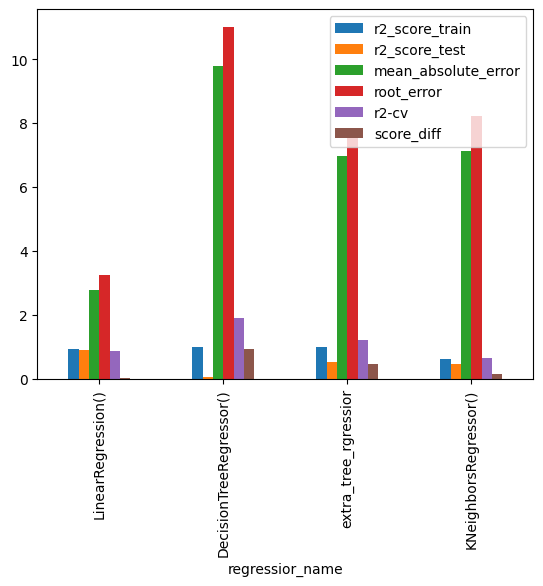

In [28]:
ml_compare.plot.bar()
plt.show()

In [29]:
param_grid=[]
p=RidgeCV.get_params(regression_lr)
param_grid.append(p)
print(param_grid)

[{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}]


In [32]:
finalmodel=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize='deprecated',positive=False)
finalmodel.fit(x_train,y_train)
pred_final=finalmodel.predict(x_test)
r2_s=r2_score(y_test,pred_final)
print('accuracy score=',r2_s*100)

accuracy score= 91.72122929401225


In [31]:
## Saving the file:
file_name='BASEBALL_WINNING_PREDICTION_ANALYSIS.pkl'
pickle.dump(finalmodel,open(file_name,'wb'))